<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Contents</a></span></li><li><span><a href="#2.1.-Numpy-ndarray---создание" data-toc-modified-id="2.1.-Numpy-ndarray---создание-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2.1. Numpy ndarray - создание</a></span></li><li><span><a href="#2.2.-Numpy-ndarray---индексы" data-toc-modified-id="2.2.-Numpy-ndarray---индексы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2.2. Numpy ndarray - индексы</a></span><ul class="toc-item"><li><span><a href="#TLDR:" data-toc-modified-id="TLDR:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>TLDR:</a></span></li></ul></li><li><span><a href="#2.3.-Numpy-ndarray---элементарные-операции-с-массивами" data-toc-modified-id="2.3.-Numpy-ndarray---элементарные-операции-с-массивами-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>2.3. Numpy ndarray - элементарные операции с массивами</a></span><ul class="toc-item"><li><span><a href="#TLDR:" data-toc-modified-id="TLDR:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>TLDR:</a></span></li></ul></li><li><span><a href="#2.4.-Numpy---основные-функции." data-toc-modified-id="2.4.-Numpy---основные-функции.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>2.4. Numpy - основные функции.</a></span><ul class="toc-item"><li><span><a href="#TLDR:" data-toc-modified-id="TLDR:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>TLDR:</a></span></li></ul></li><li><span><a href="#2.5.-Numpy---I/O." data-toc-modified-id="2.5.-Numpy---I/O.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>2.5. Numpy - I/O.</a></span></li></ul></div>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# 2.1. Numpy ndarray - создание

Numpy - пакет для векторизованных вычислений в Python'e. Основной объект в numpy - nddarray, который располагается напрерывно в памяти и позволяет производить быстрые вычисления (конструктор для ndarray - array, так как последний не является массивом, то мы будем использовать array и ndarray как синонимы без всякого риска).

В чем преимущества массива в numpy перед списком в Питоне?

* статическая типизация и гомогенность;
* возможность компиляции функций, работающих со статистически типизированными объектами;
* как следствие, эффективное использование RAM и CPU;
* broadcasting (рассмотрим далее).

То, что элементы array расположены последовательно означает, что следовать за a[i] элементом массива в памяти будет элемент a[i+1]. Каждый элемент занимает, разумеется, itemsize байтов.

In [2]:
import numpy as np

In [3]:
a = np.array([1,2,3,4], dtype=np.int16)

In [4]:
a.shape

(4,)

Shape - кортеж, который указывает число элементов в каждом измерении. 

In [5]:
a = np.array([[1, 2], [3, 4]])

In [6]:
a.size

4

In [7]:
a.shape

(2, 2)

In [8]:
a.dtype

dtype('int64')

In [9]:
a.itemsize

8

In [10]:
a.nbytes

32

При желании, можно использовать np.size(np.object) и np.shape(np.object):

In [11]:
np.size(a)

4

In [12]:
np.shape(a)

(2, 2)

При необходимости, не стоит принебрегать встроенной справкой:

In [13]:
np.array?

Docstring:
array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
      like=None)

Create an array.

Parameters
----------
object : array_like
    An array, any object exposing the array interface, an object whose
    ``__array__`` method returns an array, or any (nested) sequence.
    If object is a scalar, a 0-dimensional array containing object is
    returned.
dtype : data-type, optional
    The desired data-type for the array. If not given, NumPy will try to use
    a default ``dtype`` that can represent the values (by applying promotion
    rules when necessary.)
copy : bool, optional
    If ``True`` (default), then the array data is copied. If ``None``,
    a copy will only be made if ``__array__`` returns a copy, if obj is
    a nested sequence, or if a copy is needed to satisfy any of the other
    requirements (``dtype``, ``order``, etc.). Note that any copy of
    the data is shallow, i.e., for arrays with object dtype, the new
    array will point to the 

И специальными функциями numpy:

In [ ]:
np.lookfor('create array')

AttributeError: `np.lookfor` was removed in the NumPy 2.0 release. Search NumPy's documentation directly.

и IPython:

In [15]:
np.con*?

np.concat
np.concatenate
np.conj
np.conjugate
np.convolve

Разумеется, произвольно присваивать значения элементам массива нельзя:

In [16]:
a[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

In [17]:
a[0,0] = 100

**Создание массивов**

Создавать из списков мы уже умеем:

In [18]:
np.array([1,2,3,4], dtype=np.int16)

array([1, 2, 3, 4], dtype=int16)

Разумеется, главное - чтобы объект, корый передается конструктору, поддерживал протокол итерации.

In [19]:
np.array((1,2,3,4), dtype=np.int16)

array([1, 2, 3, 4], dtype=int16)

In [20]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [21]:
np.linspace(0, 1, 25)

array([0.        , 0.04166667, 0.08333333, 0.125     , 0.16666667,
       0.20833333, 0.25      , 0.29166667, 0.33333333, 0.375     ,
       0.41666667, 0.45833333, 0.5       , 0.54166667, 0.58333333,
       0.625     , 0.66666667, 0.70833333, 0.75      , 0.79166667,
       0.83333333, 0.875     , 0.91666667, 0.95833333, 1.        ])

In [22]:
np.logspace(0, 10, 10)

array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10])

In [23]:
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [24]:
np.zeros((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [25]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [26]:
np.diag(np.array([1, 2, 3, 4]))

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

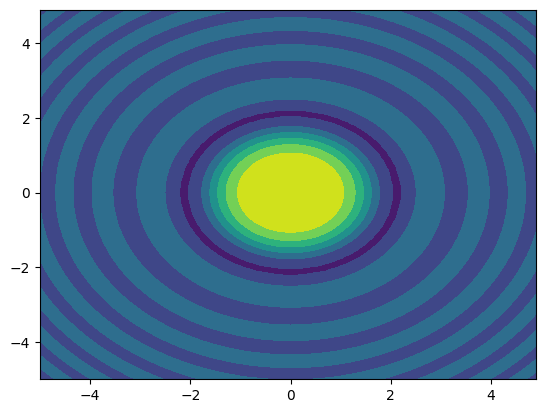

In [27]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)

In [28]:
xx.shape

(1, 100)

In [29]:
yy.shape

(100, 1)

** Случайные массивы **

на интервале [0,1]:

In [30]:
np.random.rand(3,2)

array([[0.50599005, 0.99329534],
       [0.84426017, 0.84439431],
       [0.55374426, 0.26424468]])

Нормально распределенные:

In [31]:
np.random.randn(3,2)

array([[-1.41740084, -0.05544879],
       [ 1.67474784, -1.50069886],
       [-0.41492806, -1.25114599]])

-- N: иногда полезно получить случайное целое число:

In [32]:
np.random.randint(2,10)

6

In [33]:
np.random.random_integers(2,10)

C:\Users\roaoc\AppData\Local\Temp\ipykernel_21368\2841189529.py:1: DeprecationWarning: This function is deprecated. Please call randint(2, 10 + 1) instead
  np.random.random_integers(2,10)


np.int32(3)

# 2.2. Numpy ndarray - индексы

Отдельно рассмотрим 1-мерный и многомерные массивы.

In [34]:
np.random.rand(3,)[1]

np.float64(0.4222740221667681)

Для одномерного массива получим сразу элемент, который находится по данному индексу. Для n-мерного массива подобная индексация вернет массив размера n-1.

In [35]:
np.random.rand(3,5,10)[1].shape

(5, 10)

In [36]:
np.random.rand(3,5)[1].shape

(5,)

Можно использовать ':' вместо индекса:

In [37]:
A = np.random.rand(3,5)

In [38]:
A

array([[0.94171789, 0.53251724, 0.28883632, 0.43191075, 0.88439594],
       [0.03949363, 0.11117872, 0.20617291, 0.06818416, 0.67621756],
       [0.9739369 , 0.40462894, 0.71478262, 0.03472742, 0.54663473]])

In [39]:
A[0,:]

array([0.94171789, 0.53251724, 0.28883632, 0.43191075, 0.88439594])

In [40]:
A[:,0]

array([0.94171789, 0.03949363, 0.9739369 ])

Поддерживается стандартный протокол - python slicing syntax ([lower:upper:step]) :

In [41]:
A[0,:]

array([0.94171789, 0.53251724, 0.28883632, 0.43191075, 0.88439594])

In [42]:
A[0,:][0:4:2]

array([0.94171789, 0.28883632])

Операция slicing создает т.н. view - то есть данные не копируются, поэтому исходный объект по адресу - mutable.

In [43]:
A[0,:][0:4:2] = [1.0, 2.5]

In [54]:
A

array([[1.        , 0.62932999, 2.5       , 0.35698796, 0.81913345],
       [0.64014279, 0.71505249, 0.73842252, 0.97099961, 0.24604924],
       [0.04258158, 0.24779727, 0.04501664, 0.70546163, 0.83470677]])

Параметры для slicing могут пропускаться:

In [44]:
A[0,:][0:4:2]

array([1. , 2.5])

In [45]:
A[0,:][0:4]

array([1.        , 0.53251724, 2.5       , 0.43191075])

In [46]:
A[0,:][:3]

array([1.        , 0.53251724, 2.5       ])

In [47]:
A[0,:][::-1]

array([0.88439594, 0.43191075, 2.5       , 0.53251724, 1.        ])

In [48]:
A[0,:][-3:]

array([2.5       , 0.43191075, 0.88439594])

** Fancy Indexing **

Этим термином обозначается индексирование с помощью массивов (или иных итерируемых конструкций).

In [49]:
row_indices = [1, 2]
A[row_indices]

array([[0.03949363, 0.11117872, 0.20617291, 0.06818416, 0.67621756],
       [0.9739369 , 0.40462894, 0.71478262, 0.03472742, 0.54663473]])

In [50]:
col_indices = [1, -1]
A[row_indices, col_indices]

array([0.11117872, 0.54663473])

Возможно Булево индексирование (**Boolean indexing**):

In [51]:
B = np.array([n for n in range(5)])
row_mask = np.array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [52]:
row_mask = np.array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

Это очень удобно, как вы наверняка догадались, если мы хотим отобрать данные, отвечающие определенным условиям:

In [53]:
x = np.arange(0, 10, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [54]:
mask = (5 < x) * (x < 7.5)
mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [55]:
x[mask]

array([5.5, 6. , 6.5, 7. ])

Получить список индексов элементов, отвечающих заданной маске, можно с помощью **which**:

In [56]:
indices = np.where(mask)

indices

(array([11, 12, 13, 14]),)

In [57]:
x[indices]

array([5.5, 6. , 6.5, 7. ])

**take** еще одна конструкция выбора элементов массива:

In [58]:
v = np.arange(-3,3)
row_indices = [1, 3, 5]

In [59]:
v[row_indices]

array([-2,  0,  2])

In [60]:
v.take(row_indices)

array([-2,  0,  2])

In [61]:
np.take(v, row_indices)

array([-2,  0,  2])

** choices ** - полезная функция для выбора элеметов из нескольких массивов:

In [62]:
which = [1, 0, 1, 0]
choices = [[-1,-2,-3,-4], [1,2,3,4]]
np.choose(which, choices)

array([ 1, -2,  3, -4])

** compress ** - альтернативой Булевому индексированию:

In [63]:
a = np.array([[1, 2], [3, 4], [5, 6]])
np.compress([False, True, True], a, axis=0)

array([[3, 4],
       [5, 6]])

## TLDR:
* основной объект numpy - гомогенный массив фиксированного размера;
* для доступа к элементам массива пользуйтесь slicing и помните, что slicing создает view, а значит исходный массив может быть изменен.

# 2.3. Numpy ndarray - элементарные операции с массивами

** Broadcasting **

Концепеция broadcasting является ключевой для понимания операций с массивами. Обычно, операции с массивами производятся поэлементно. 

In [64]:
a = np.array([1.0,2.0,3.0])
b = np.array([2.0,2.0,2.0])

In [65]:
a * b

array([2., 4., 6.])

Что, если массивы разного размера? Начнем с простого - скаляр и вектор:

In [66]:
a = np.array([1.0,2.0,3.0])
b = 2.0
a * b

array([2., 4., 6.])

Все просто - скаляр словно "вырастает" (broadcasted) до размеров вектора и производится поэлементная операция (разумеется, это умозрительная аналогия - новый вектор из 2 не создается!).

Общее правило таково:

операция может произведена если размерность "крайних" осей массивов совпадает (trailing dimension), либо один из элементов является скаляром.

Пример из оффициальной документации:

In [67]:
'''

Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 256 x 256 x 3

A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5

'''
pass

а вот эти операции дадут вам ошибку:

In [68]:
'''
A      (1d array):  3
B      (1d array):  4 # trailing dimensions do not match

A      (2d array):      2 x 1
B      (3d array):  8 x 4 x 3 # second from last dimensions mismatched
'''
pass

In [69]:
x = np.arange(4)
xx = x.reshape(4,1)
y = np.ones(5)
z = np.ones((3,4))

print(x.shape)

print(y.shape)

x + y

(4,)
(5,)


ValueError: operands could not be broadcast together with shapes (4,) (5,) 

In [71]:
print(xx.shape)
print(y.shape)
print((xx + y).shape)
print(xx + y)

print('-------')

print(x.shape)
print(z.shape)
print((x + z).shape)
print(x + z)

(4, 1)
(5,)
(4, 5)
[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]]
-------
(4,)
(3, 4)
(3, 4)
[[1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [1. 2. 3. 4.]]


Классный пример из официальной документации:

In [72]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a[:, np.newaxis] + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

In [73]:
a[:, np.newaxis]

array([[ 0.],
       [10.],
       [20.],
       [30.]])

In [74]:
a[:, np.newaxis].shape

(4, 1)

** Операции вида "массив - скаляр" **

In [75]:
A

array([[1.        , 0.53251724, 2.5       , 0.43191075, 0.88439594],
       [0.03949363, 0.11117872, 0.20617291, 0.06818416, 0.67621756],
       [0.9739369 , 0.40462894, 0.71478262, 0.03472742, 0.54663473]])

In [76]:
A + 2

array([[3.        , 2.53251724, 4.5       , 2.43191075, 2.88439594],
       [2.03949363, 2.11117872, 2.20617291, 2.06818416, 2.67621756],
       [2.9739369 , 2.40462894, 2.71478262, 2.03472742, 2.54663473]])

** Операции вида "массив - массив" **

Производятся поэлементно с учетом правил broadcasting:

In [77]:
A * A

array([[1.00000000e+00, 2.83574606e-01, 6.25000000e+00, 1.86546896e-01,
        7.82156175e-01],
       [1.55974673e-03, 1.23607086e-02, 4.25072681e-02, 4.64907951e-03,
        4.57270189e-01],
       [9.48553090e-01, 1.63724575e-01, 5.10914198e-01, 1.20599346e-03,
        2.98809523e-01]])

In [78]:
A / A

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

** Матричные операции**

In [79]:
A = np.random.rand(3,3)

In [80]:
np.dot(A,A)

array([[1.02490928, 0.96037376, 0.84350681],
       [1.23895816, 1.34912634, 1.06312387],
       [0.87249711, 0.89865854, 0.79692872]])

In [81]:
v = np.random.randn(3)
print(v)

[-0.73588214  0.74254055 -1.17536557]


In [82]:
np.dot(A,v)

array([ 0.07718401, -1.08474879, -0.80077769])

In [83]:
np.dot(v,v)

np.float64(2.4743732192672057)

Если хочется использовать по умолчанию операции из матричной алгебры, то можно использовать конструктор matrix().

In [84]:
M = np.matrix(A)

In [85]:
v1 = np.matrix(v).T

In [86]:
M.shape

(3, 3)

In [87]:
v1.shape

(3, 1)

In [88]:
v1.T * v1

matrix([[2.47437322]])

In [89]:
M * v1

matrix([[ 0.07718401],
        [-1.08474879],
        [-0.80077769]])

** Преобразование массивов**

In [90]:
A.T

array([[0.47040254, 0.84102761, 0.4807831 ],
       [0.85327642, 0.57023132, 0.40488638],
       [0.17887839, 0.75659139, 0.63607661]])

In [91]:
C = np.matrix([[1j, 2j], [3j, 4j]])

In [92]:
np.conjugate(C)

matrix([[0.-1.j, 0.-2.j],
        [0.-3.j, 0.-4.j]])

Эрмитово сопряжение:

In [93]:
C.H

matrix([[0.-1.j, 0.-3.j],
        [0.-2.j, 0.-4.j]])

In [94]:
np.real(C)

matrix([[0., 0.],
        [0., 0.]])

In [95]:
np.imag(C)

matrix([[1., 2.],
        [3., 4.]])

** reshape **

In [96]:
a

array([ 0., 10., 20., 30.])

In [97]:
a = a.reshape((2, 2))

In [98]:
a

array([[ 0., 10.],
       [20., 30.]])

** resize **

In [99]:
a = np.arange(4)

In [100]:
a.resize((8,))

In [101]:
a

array([0, 1, 2, 3, 0, 0, 0, 0])

** repeat **

In [102]:
a = np.array([[1, 2], [3, 4]])
np.repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [103]:
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

** concatenate **

In [104]:
a

array([[1, 2],
       [3, 4]])

In [105]:
b = np.array([[5, 6]])

In [106]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [107]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

Что касается параметра axis, то иллюстрировать его использование можно следующим образом:

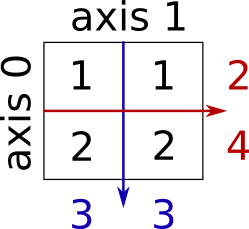

In [108]:
from IPython.display import Image
Image(filename='axis.png')

** hstack **

Название говорит само за себя - horizontal stack.

In [109]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

In [110]:
a.shape

(2, 2)

In [111]:
b.T.shape

(2, 1)

** vstack **

In [112]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [113]:
a.shape

(2, 2)

In [114]:
b.shape

(1, 2)

** Копии и view **

Мы помним, что очень важно различать копирование объекта и присваивание новой ссылки на объект. Numpy в этом смысле не отличается от списков:

In [115]:
A = np.array([[1, 2], [3, 4]])

In [116]:
B = A

In [117]:
B[0,0] = 10

In [118]:
A

array([[10,  2],
       [ 3,  4]])

Если это не тот тип поведения, который нам нужен - следует использовать np.copy():

In [119]:
B = np.copy(A)

In [120]:
B[0,0] = 100

In [121]:
A

array([[10,  2],
       [ 3,  4]])

Важно помнить, что если вы используете view массива, то копии вы не создаете!

In [122]:
a = np.arange(10)

In [123]:
b = a[::2]

In [124]:
np.may_share_memory(a, b)

True

In [125]:
c = a[::2].copy()
np.may_share_memory(a, c)

False

In [126]:
d = a.T
np.may_share_memory(a, d)

True

Как следствие - никогда не делайте так:

In [127]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [128]:
a += a.T

In [129]:
a

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

## TLDR:
* следует отличать копию массива и view;
* при осуществлении операций помните про правила broadcasting;
* запомните hstack и vstack.

# 2.4. Numpy - основные функции.

** Встроенные функции массива **

In [130]:
m = np.random.rand(3,3)

In [131]:
m.sum()

np.float64(4.29742059702364)

In [132]:
m.max()

np.float64(0.9321045891214571)

** Всегда используйте встроенные функции! **

In [133]:
a = np.random.rand(100000)

In [135]:
%timeit -n 1000 max(a)

2.99 ms ± 54.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [136]:
%timeit -n 1000 a.max()

14.8 μs ± 2.52 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [137]:
%timeit -n 1000 sum(a)

4.81 ms ± 125 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [139]:
%timeit -n 1000 a.sum()

25 μs ± 1.99 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Просто считать сумму элементов матрицы или находить максимальный элемент не так интересно, и тут нам помогают axis:

In [140]:
m

array([[0.20131616, 0.93210459, 0.12456469],
       [0.78427835, 0.06743222, 0.72331011],
       [0.20464794, 0.65869288, 0.60107366]])

In [141]:
m.sum(axis=0)

array([1.19024245, 1.65822969, 1.44894845])

In [142]:
m.sum(axis=1)

array([1.25798543, 1.57502068, 1.46441449])

In [143]:
m.max(axis=0)

array([0.78427835, 0.93210459, 0.72331011])

Очень полезно произведение всех элементов:

In [144]:
m.prod(axis=1)

array([0.02337428, 0.03825271, 0.08102482])

Кумулятивная сумма элементов:

In [145]:
a.cumsum() * 100

array([2.76296090e+01, 6.61737387e+01, 7.05561552e+01, ...,
       5.00342422e+06, 5.00349025e+06, 5.00350866e+06])

Кумулятивное произведение:

In [146]:
a.cumprod()

array([0.27629609, 0.10649592, 0.00466709, ..., 0.        , 0.        ,
       0.        ])

**Простые статистики**

**Среднее**

In [147]:
m.mean(axis=0)

array([0.39674748, 0.55274323, 0.48298282])

In [148]:
np.mean(m, axis=0)

array([0.39674748, 0.55274323, 0.48298282])

In [149]:
np.mean(a)

np.float64(0.5003508662051052)

In [150]:
a.mean()

np.float64(0.5003508662051052)

**Медиана**

In [151]:
np.median(m, axis=0)

array([0.20464794, 0.65869288, 0.60107366])

In [152]:
np.median(a)

np.float64(0.5020382147287816)

** Дисперсия **

In [153]:
np.std(m, axis=0)

array([0.27402908, 0.36086339, 0.25830615])

In [154]:
m.std(axis=0)

array([0.27402908, 0.36086339, 0.25830615])

In [155]:
np.var(a)

np.float64(0.08279074061151524)

In [156]:
a.var()

np.float64(0.08279074061151524)

** Сортировка **

In [157]:
np.sort(a)

array([7.46364259e-06, 1.59501741e-05, 1.73530693e-05, ...,
       9.99988768e-01, 9.99989046e-01, 9.99993603e-01])

Функция выше возвращает отсортированную копию массива. Если нужна сортировка in-place:

In [158]:
a.sort()

In [159]:
a = np.random.rand(100000)

Также иногда бывает полезно получить только список индексов в правильном порядке:

In [160]:
np.argsort(a)

array([ 7143, 85169,  2998, ..., 61674, 26390, 65590])

In [161]:
np.argmax(a)

np.int64(65590)

In [162]:
np.argmin(a)

np.int64(7143)

In [163]:
np.nonzero(a)

(array([    0,     1,     2, ..., 99997, 99998, 99999]),)

** Функции для работы с матрицами **

In [164]:
m

array([[0.20131616, 0.93210459, 0.12456469],
       [0.78427835, 0.06743222, 0.72331011],
       [0.20464794, 0.65869288, 0.60107366]])

In [165]:
np.diag(m)

array([0.20131616, 0.06743222, 0.60107366])

In [166]:
m.diagonal()

array([0.20131616, 0.06743222, 0.60107366])

Для целого класса функций из линейной алгебры есть свой суб-модуль np.linalg.

http://docs.scipy.org/doc/numpy/reference/routines.linalg.html

In [167]:
MM = np.random.randn(9, 6)

In [168]:
U, s, V = np.linalg.svd(MM, full_matrices=False)
U.shape, V.shape, s.shape

((9, 6), (6, 6), (6,))

In [169]:
S = np.diag(s)
np.allclose(MM, np.dot(U, np.dot(S, V)))

True

** Векторизация кода **

В numpy есть встроенная функция vectorize, которая "автоматически" векторизует вашу функцию:

In [170]:
def heavyside(x):
    if x >= 0:
        return 1
    else:
        return 0

In [171]:
heavyside(np.array([-3,-2,-1,0,1,2,3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [172]:
heavyside_vec = np.vectorize(heavyside)

In [173]:
heavyside_vec(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

Тем не менее, лучше сразу пишите так:

In [174]:
def heavyside(x):
    return 1 * (x >= 0)

In [175]:
heavyside(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [176]:
np.array([-3,-2,-1,0,1,2,3]) >= 0

array([False, False, False,  True,  True,  True,  True])

In [177]:
1 * (np.array([-3,-2,-1,0,1,2,3]) >= 0)

array([0, 0, 0, 1, 1, 1, 1])

** Условные выражения **

Как вы уже поняли, для вектора конструкция типа if (vector) не подходит.

In [178]:
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

no element in M is larger than 5


In [179]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

all elements in M are not larger than 5


## TLDR:
- всегда используйте встроенные в np функции;
- векторизуйте везде, где это возможно!

# 2.5. Numpy - I/O.

В данном случае у нас на выбор 2 опции - либо формат numpy, либо просто текстовый файл.

In [180]:
np.save("random.npy", M)

In [181]:
np.load("random.npy")

array([[0.47040254, 0.85327642, 0.17887839],
       [0.84102761, 0.57023132, 0.75659139],
       [0.4807831 , 0.40488638, 0.63607661]])

In [182]:
np.savetxt('random.csv', M, delimiter='\t')

In [186]:
# Выполняю в venv'е + VsCode с плагином, поэтому заменил cat на виндовский аналог)
!type random.csv

4.704025357735855950e-01	8.532764194133574120e-01	1.788783939383556953e-01
8.410276106843598276e-01	5.702313237349424524e-01	7.565913906278681766e-01
4.807831029920673904e-01	4.048863835456295579e-01	6.360766132636617165e-01


In [187]:
np.loadtxt('random.csv')

array([[0.47040254, 0.85327642, 0.17887839],
       [0.84102761, 0.57023132, 0.75659139],
       [0.4807831 , 0.40488638, 0.63607661]])